In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [3]:
df=pd.read_csv('marriage_proposal.csv')
df.head()

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response,AgeCategory
0,156,59,7977,3,1,1,45,1,Senior
1,169,32,5842,0,1,5,46,1,Middle-aged
2,178,42,17638,2,5,5,13,0,Middle-aged
3,164,78,8793,0,0,7,52,0,Senior
4,160,35,15262,6,0,0,9,1,Middle-aged


In [4]:
df.shape

(10000, 9)

In [5]:
df.head()

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response,AgeCategory
0,156,59,7977,3,1,1,45,1,Senior
1,169,32,5842,0,1,5,46,1,Middle-aged
2,178,42,17638,2,5,5,13,0,Middle-aged
3,164,78,8793,0,0,7,52,0,Senior
4,160,35,15262,6,0,0,9,1,Middle-aged


In [6]:
df['AgeCategory'].unique()

array(['Senior', 'Middle-aged', 'Young', nan], dtype=object)

In [7]:
df[df['AgeCategory']=='Young']['Age'].min(),df[df['AgeCategory']=='Young']['Age'].max()

(21, 30)

In [8]:
df[df['AgeCategory']=='Middle-aged']['Age'].min(),df[df['AgeCategory']=='Middle-aged']['Age'].max()

(31, 50)

In [9]:
df[df['AgeCategory']=='Senior']['Age'].min(),df[df['AgeCategory']=='Senior']['Age'].max()

(51, 80)

In [10]:
def age_category(x):
    if x in range(0,31):
        return 'Young'
    elif x in range(31,51):
        return 'Middle-aged'
    else:
        return 'Senior'

In [11]:
df['AgeCategory']=df['Age'].apply(age_category)
df.head()

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM,Response,AgeCategory
0,156,59,7977,3,1,1,45,1,Senior
1,169,32,5842,0,1,5,46,1,Middle-aged
2,178,42,17638,2,5,5,13,0,Middle-aged
3,164,78,8793,0,0,7,52,0,Senior
4,160,35,15262,6,0,0,9,1,Middle-aged


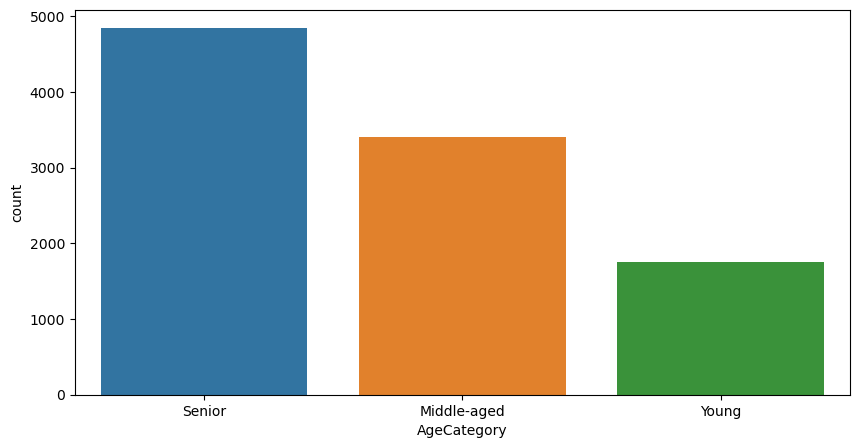

In [12]:
sns.countplot(x=df['AgeCategory'])
plt.show()

In [13]:
y=df['Response']
x=df[['Height', 'Age', 'Income', 'RomanticGestureScore', 'CompatibilityScore','CommunicationScore', 'DistanceKM']]

In [14]:
len(x.columns)

7

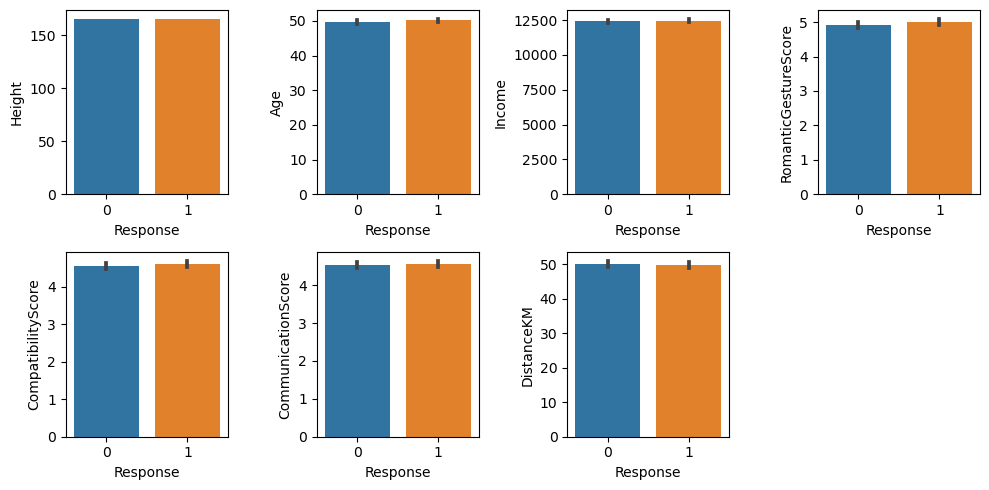

In [15]:
r=2
c=4
it=1
for i in x.columns:
    plt.subplot(r,c,it)
    sns.barplot(x=y,y=i,data=df)
    it+=1
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mmax=MinMaxScaler()

In [18]:
x=pd.DataFrame(mmax.fit_transform(x),columns=x.columns)
x.head()

,Height,Age,Income,RomanticGestureScore,CompatibilityScore,CommunicationScore,DistanceKM
0,0.200000,0.650000,0.198480,0.3,0.111111,0.111111,0.448980
1,0.633333,0.200000,0.056137,0.0,0.111111,0.555556,0.459184
2,0.933333,0.366667,0.842590,0.2,0.555556,0.555556,0.122449
3,0.466667,0.966667,0.252884,0.0,0.000000,0.777778,0.520408
4,0.333333,0.250000,0.684179,0.6,0.000000,0.000000,0.081633


In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [20]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [23]:
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

In [24]:
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)
lr_model

LogisticRegression()

In [25]:
lr_model.intercept_[0]

-0.19320851475102616

In [26]:
lr_model.coef_[0]

array([0.07190203, 0.06781628, 0.0838068 , 0.03303326, 0.04042617,
       0.10797399, 0.0069357 ])

In [27]:
def sigmoid(x):
    res=1/(1+np.exp(-x))
    if res < 0.5:
        return 0
    else:
        return 1


In [28]:
sigmoid(lr_model.intercept_[0])

0

In [29]:
len(xtrain.columns)

7

In [30]:
list(zip([i for i in lr_model.coef_[0]],xtest[0:1].values[0]))

[(0.07190202954909482, 0.833333333333333),
 (0.06781627910896618, 0.7166666666666668),
 (0.08380680295951487, 0.32735515701046736),
 (0.033033258361372254, 0.30000000000000004),
 (0.04042616826434156, 0.3333333333333333),
 (0.10797399401366305, 0.0),
 (0.006935701496377457, 0.13265306122448978)]

In [31]:
def check(x):
    a=list(zip([i for i in lr_model.coef_[0]],x))
    res1=[i*j for i,j in a]
    
    res=sum(res1)+lr_model.intercept_[0]
    return sigmoid(res)
    
    
    